[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sascha-senko/TensorflowCourse/blob/HSinger04/ANNwTFHW7.ipynb)

## Imports

In [1]:
# TODO: Clean up imports
import matplotlib.pyplot as plt
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, \
    BatchNormalization, ELU, Flatten, Dense, ZeroPadding2D, AveragePooling2D, \
    Layer, GlobalAveragePooling2D, concatenate
from tensorflow.keras.regularizers import L2
from functools import partial  
from tensorflow import debugging as debug

## Load dataset

In [2]:
(x_train, _), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = tf.data.Dataset.from_tensor_slices(x_train)
# take only first 1000 examples
x_test = tf.data.Dataset.from_tensor_slices(x_test).take(1000)

# Maps labels to object names
num_to_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

y_test = [num_to_name[y] for y in y_test]
# take only first 1000 examples
y_test = tf.data.Dataset.from_tensor_slices(y_test).take(1000)

4423680/4422102 [==============================] - 0s 0us/step


## Inspect data set

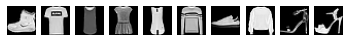

In [3]:
fig, ax = plt.subplots(1,10)
shapes = []

for i, img in enumerate(x_train):
    if i == 10:
        break
    ax[i].imshow(img, cmap='gray')
    ax[i].axis("off")

## Define some constants

In [4]:
# arbitrarily set. Feel free to change these
SHUFFLE_SIZE = x_test.cardinality()
PREFETCH_SIZE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 64

## Prepare data

In [5]:
def process_inp(input):
    """ rescale and add channel dimension """
    # normalize between zero and one
    input = input / 255
    # add extra dimension for channel
    input = tf.expand_dims(input, -1)
    return input    



def data_pipeline(data, training):
    """ helper function for data pipeline - does all the things we need """
    
    data = data.map(process_inp)

    if training:
        data = data.shuffle(buffer_size=SHUFFLE_SIZE)

    data = data.batch(BATCH_SIZE)
    data = data.prefetch(PREFETCH_SIZE)
    return data

x_train = data_pipeline(x_train, True)
x_test = data_pipeline(x_test, False)

## Encoder

In [8]:
class Encoder(Model):
    # TODO: Implement init. If necessary, add additional arguments to init. 
    # Please use an output dimension of 10 for the final dense layer.
    def __init__():
        super(Encoder, self).init()
        raise NotImplementedError("TODO: Implement Encoder")

    # TODO: Implement call. If necessary, add additional arguments to call
    def call(x):
        raise NotImplementedError("TODO: Define call")

### Check Encoder

In [9]:
test_inp = next(iter(x_train))
# TODO: @Sascha: Maybe you need to adjust the init arguments?
encoder = Encoder()
out = encoder(x)
# Assert that shape of out is BATCH_SIZE, 10
debug.assert_equal(out.shape, tf.zeros(BATCH_SIZE, 10).shape)

TypeError: ignored

In [10]:
## Decoder

In [11]:
class Decoder(Model):
    # TODO: Implement init. If necessary, add additional arguments to init. 
    def __init__():
        super(Decoder, self).init()
        raise NotImplementedError("TODO: Implement Encoder")

    # TODO: Implement call. If necessary, add additional arguments to call
    def call(x):
        raise NotImplementedError("TODO: Define call")

### Check Decoder

In [12]:
test_inp = tf.random.uniform((BATCH_SIZE, 10))
# TODO: @Sarah: Maybe you need to adjust the init arguments?
decoder = Decoder()
out = decoder(x)
# Assert that shape of out is BATCH_SIZE, 28, 28, 1
check_tensor = tf.zeros(BATCH_SIZE, 28, 28, 1)
# Check shape
debug.assert_equal(out.shape, check_tensor.shape)
# Check values between 0 and 1
debug.assert_greater_equal(out, check_tensor)
debug.assert_less_equal(out, check_tensor + 1)

TypeError: ignored

## Autoencoder

In [13]:
class Autoencoder(Model):
    def __init__():
        super(Autoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def call(self, x):    
        x = self.encoder(x)
        x = self.decoder(x)

        return x

    def embed(self, x):
        return self.encoder(x)

## Helper functions

In [14]:
def train_step(model, input, target, loss_function, optimizer):
  # loss_object and optimizer_object are instances of respective tensorflow classes
  with tf.GradientTape() as tape:
    prediction = model(input, training=True)
    loss = loss_function(target, prediction)
    gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  return loss 

def test(model, test_data, loss_function):
  # test over complete test data

  test_accuracy_aggregator = []
  test_loss_aggregator = []

  for (input, target) in test_data:
    prediction = model(input)
    sample_test_loss = loss_function(target, prediction)
    sample_test_accuracy =  np.argmax(target, axis=1) == np.argmax(prediction, axis=1)
    sample_test_accuracy = np.mean(sample_test_accuracy)
    test_loss_aggregator.append(sample_test_loss.numpy())
    test_accuracy_aggregator.append(np.mean(sample_test_accuracy))

  test_loss = np.mean(test_loss_aggregator)
  test_accuracy = np.mean(test_accuracy_aggregator)

  return test_loss, test_accuracy

  def plot_stats(train_stat, test_stat, stat_name):
    plt.figure()
    line1, = plt.plot(train_stat)
    line2, = plt.plot(test_stat)
    plt.xlabel("Training steps")
    plt.ylabel(stat_name)
    plt.legend((line1, line2), ("training", "test"))
    plt.show()

## Prepare for training

In [15]:
NUM_EPOCHS = 10
LEARNING_RATE = 0.001   
loss = tf.keras.losses.MeanSquaredError()
OPTIMIZER = tf.keras.optimizers.Adam(LEARNING_RATE)
TRAIN_STAT_DIM = (int(x_train.cardinality()))

# Collects embeddings of test set. 
# First dimension: Autoencoder vs VAE
# Second dimension: Embedding
EMBEDDINGS = [[], []]

# TODO: Define models
models = None
raise NotImplementedError("Define models")

NotImplementedError: ignored

In [16]:
model_id = 0

for model in models:

    # TODO: maybe change loss for different models
    # remove all active models for memory purposes
    tf.keras.backend.clear_session()
    model = eval(model_str)


    # Initialize lists for later visualization.
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    for epoch in range(NUM_EPOCHS):
        print('Epoch: ' + str(epoch+1))

        # shuffle train data. No need to shuffle test data
        train_data = train_data.shuffle(buffer_size=BATCH_SIZE)

        train_loss_stat = np.empty(TRAIN_STAT_DIM)
        train_accuracy_stat = np.empty(TRAIN_STAT_DIM)
        for i, (input, target) in enumerate(train_data):
            train_loss, train_accuracy = train_step(model, input, target, loss, optimizer)
            train_loss_stat[i] = train_loss
            train_accuracy_stat[i] = train_accuracy
        train_losses.append(np.mean(train_loss_stat))
        train_accuracies.append(np.mean(train_accuracy_stat))

        # testing
        test_loss, test_accuracy = test(model, x_test, loss)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        # TODO: save

    # Get the embedding of the first 1000 images after training
    for test_batch in x_test:

        EMBEDDINGS[model_id].append(model.embed(test_batch))      

    model_id = model_id + 1

TypeError: ignored

## Plotting

In [ ]:
from sklearn.manifold import TSNE

# Flatten the embedding list
np.array()